In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from Posterior import Posterior
from Util import creation_data

In [2]:
n_times = 10
theta_true = 0.01
cfg = {'n_particles': 20, 'theta_eff': 0.5 * theta_true, 'sourcespace': None, 'data': None,
       'n_bins': 50, 'sequence_evolution': None, 'method': 'PM', 'verbose': False}
sns.set_style('darkgrid')
verbose = False

In [3]:
for j in range(n_times):
    sourcespace, data = creation_data(n_data=50, theta=theta_true)
    with open(f'data/data_unbiased_{j}.pkl', 'wb') as f:
        pickle.dump([sourcespace, data, theta_true], f)

In [4]:
ml_theta = np.zeros(n_times)
for _t in range(n_times):
    print(f'{_t} - ', end='')
    with open(f'data/data_unbiased_{_t}.pkl', 'rb') as f:
        cfg['sourcespace'], cfg['data'], useless = pickle.load(f)
    post_pm = Posterior(cfg=cfg)
    post_pm = post_pm.perform_smc()
    with open(f'sol/sol_pm_unbiased_{_t}.pkl', 'wb') as f:
        pickle.dump(post_pm, f)

    ml_theta[_t] = post_pm.ml_theta

with open('sol/ml_theta.pkl', 'wb') as f:
    pickle.dump(ml_theta, f)

0 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False
1 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False


/Users/ale/Documents/phd/toy_example/Posterior.py:111: RuntimeWarning: invalid value encountered in true_divide
  weight = np.divide(weight_u, np.sum(weight_u))
/Users/ale/Documents/phd/toy_example/Particle.py:76: RuntimeWarning: invalid value encountered in double_scalars
  rapp_like = part_aux.like / self.like
/Users/ale/Documents/phd/toy_example/Posterior.py:299: RuntimeWarning: invalid value encountered in true_divide
  self.theta_posterior /= integral


2 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False
3 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False
4 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False
5 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False
6 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False
7 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False
8 - number of particles set at: 20
number of bins for MAP estimate set at: 50
number of iteration set at: None
method: PM
verbose: False
9 - number of particles set at: 20
number

PLOT

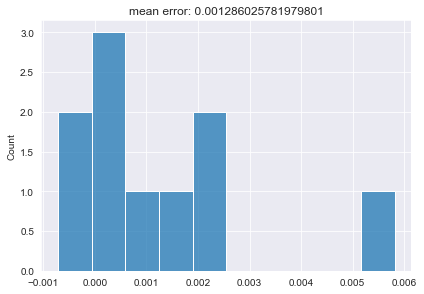

In [6]:
with open('sol/ml_theta.pkl', 'rb') as f:
    ml_theta = pickle.load(f)

plt.plot(figsize=(16, 9))
sns.histplot(ml_theta - theta_true, bins=10)
plt.tight_layout()
plt.title(f'mean error: {1 / n_times * np.sum(ml_theta - theta_true)}')
plt.savefig('fig/test_unbiased.png', dpi=100)
plt.show()